# Intégration

## Méthode rectangle

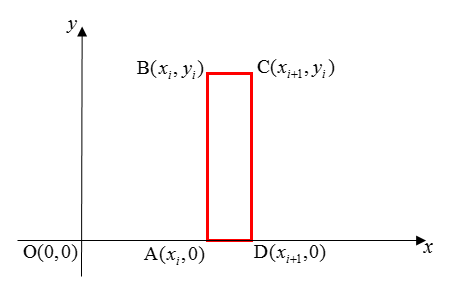

integrale = 2.663433414438276


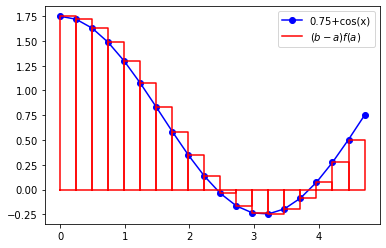

In [54]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 3*np.pi/2
nbx = 20 # Jouer ici pour voir la variabilité du résultat
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx) # création des axes x (espace linéaire)
y = 0.75+np.cos(x) # Calcul des point y(x)
plt.plot(x,y,"bo-",label="0.75+cos(x)") 

integrale = 0
for i in range(nbi):
    integrale += y[i]*(x[i+1]-x[i]) # Expression de la somme en suivant la formule (b-a)f(a)
    
    # dessin du rectangle
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0   , y[i], y[i]  , 0     , 0   ] # ordonnees des sommets
    if i ==0:
        plt.plot(x_rect, y_rect,"r",label="$(b-a)f(a)$")
    else:
        plt.plot(x_rect, y_rect,"r")
  
print("integrale =", integrale)

plt.legend()
plt.show()

Jouer avec nbx pour voir la sensibilité au pas et l'exactitude de cet intégral.

## Méthode des trapèzes

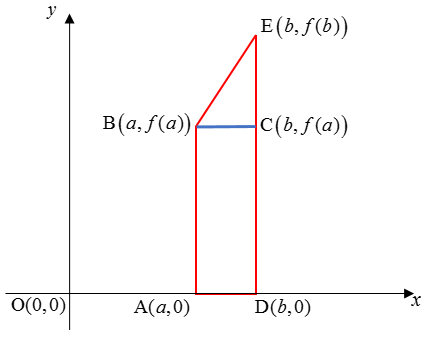

En réutilisant le code précédant, adapté le à cette formulation

integrale = 2.5394231781123633


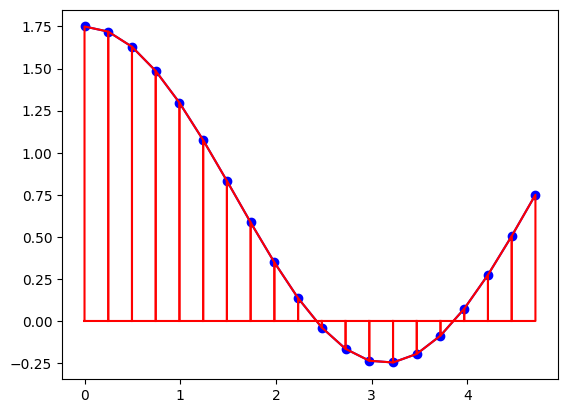

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 3*np.pi/2
nbx = 20 # Jouer ici pour voir la variabilité du résultat
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx) # création des axes x (espace linéaire)
y = 0.75+np.cos(x) # Calcul des point y(x)
plt.plot(x,y,"bo-",label="0.75+cos(x)") 

# A vous de jouer
integrale = 0
for i in range(nbi):
    integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2 # Expression de la somme en suivant la formule (b-a)/2*(f(a)+f(b))
    
    # dessin du rectangle
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0   , y[i], y[i+1]  , 0     , 0   ] # ordonnees des sommets
    if i ==0:
        plt.plot(x_rect, y_rect,"r",label="$(b-a)f(a)$")
    else:
        plt.plot(x_rect, y_rect,"r")
  
print("integrale =", integrale)

Transformer maintenant ces scripts en fonction si cela n'est pas déja fait. 
En entré, cette dernière prendra x, y et renvéra la somme de l'intégral.

rect :  2.663433414438276
trap :  2.5394231781123633


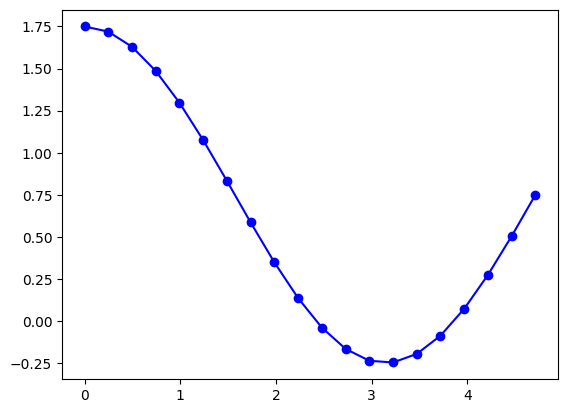

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 3*np.pi/2
nbx = 20 # Jouer ici pour voir la variabilité du résultat
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx) # création des axes x (espace linéaire)
y = 0.75+np.cos(x) # Calcul des point y(x)
plt.plot(x,y,"bo-",label="0.75+cos(x)") 

def integral_rect(x,y):
    integrale = 0
    for i in range(len(x)-1):
        integrale += y[i]*(x[i+1]-x[i]) # Expression de la somme en suivant la formule (b-a)f(a)
    return integrale
        
        
def integral_trapez(x,y):
    integrale = 0
    for i in range(len(x)-1):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2 # Expression de la somme en suivant la formule (b-a)/2*(f(a)+f(b))
    return integrale
    
print("rect : ",  integral_rect(x,y))
print("trap : ", integral_trapez(x,y))
    

## Méthode de simpson

Reprenez votre code précédant et transformer votre fonction pour qu'elle intègre la fontion cosinus. De là faite les adaptations pour obtenir la solution de simpson.

integrale rect = 2.819042506430814
integrale trap = 2.5572431186316638
integrale simp = 2.5295807584367562


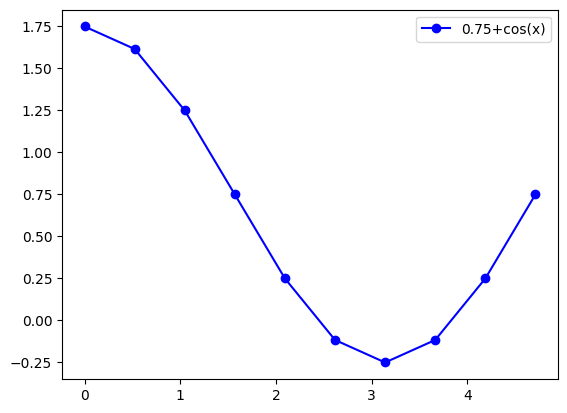

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import  scipy as scp

xmin = 0
xmax = 3*np.pi/2
nbx = 10 # Jouer ici pour voir la variabilité du résultat
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx) # création des axes x (espace linéaire)
y = 0.75+np.cos(x) # Calcul des point y(x)
plt.plot(x,y,"bo-",label="0.75+cos(x)") 


integrale = integral_trapez(x,y)
integrale2 = scp.integrate.simpson(y,x) # Utilisation de la librairie scipy
integrale3 = integral_rect(x,y)

print("integrale rect =", integrale3)
print("integrale trap =", integrale)
print("integrale simp =", integrale2)

plt.legend()
plt.show()

Comparer les trois méthodes.

# Interpolation

## Interpolation de lagrange

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Trois point à interpoller
a=0
b=8
x_arr=np.array([a,(a+b)/2,b])
y_arr=np.array([4,8,-6])

#Espace d'interpolation
x = linspace(x_arr[0], x_arr[-1], 101)


Addapter votre fonction pour effectuer à la chaine l'opération sur une courbe intégral 3 points par 3 points.

## Phénomène de Runge

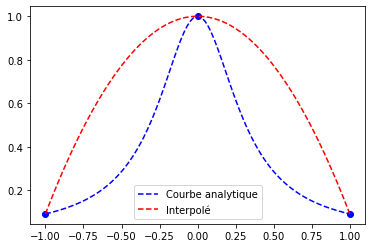

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

true_x = np.linspace(-1,1,100)
true_y = 1/(1+10*true_x**2)

x_arr = np.linspace(-1,1,3) # Trois points d'interpolations
y_arr = 1/(1+10*x_arr**2)

interp_y = lagrange(x_arr,y_arr)

plt.plot(x_arr,y_arr,'bo')
plt.plot(true_x,true_y,'b--',label="Courbe analytique")

plt.plot(true_x,np.polyval(interp_y,true_x),'r--',label="Interpolé ordre 2")
plt.legend()
plt.show()

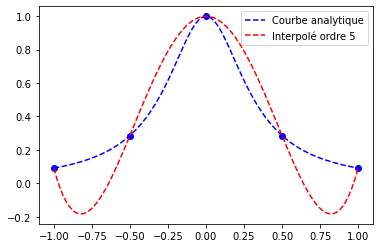

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

true_x = np.linspace(-1,1,100)
true_y = 1/(1+10*true_x**2)

x_arr = np.linspace(-1,1,5) # 5 points d'interpolations
y_arr = 1/(1+10*x_arr**2)

interp_y = lagrange(x_arr,y_arr)

plt.plot(x_arr,y_arr,'bo')
plt.plot(true_x,true_y,'b--',label="Courbe analytique")

plt.plot(true_x,np.polyval(interp_y,true_x),'r--',label="Interpolé ordre 5")
plt.legend()
plt.show()

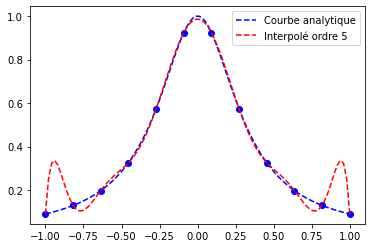

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

true_x = np.linspace(-1,1,100)
true_y = 1/(1+10*true_x**2)

x_arr = np.linspace(-1,1,12) # 12 points d'interpolations
y_arr = 1/(1+10*x_arr**2)

interp_y = lagrange(x_arr,y_arr)

plt.plot(x_arr,y_arr,'bo')
plt.plot(true_x,true_y,'b--',label="Courbe analytique")

plt.plot(true_x,np.polyval(interp_y,true_x),'r--',label="Interpolé ordre 5")
plt.legend()
plt.show()

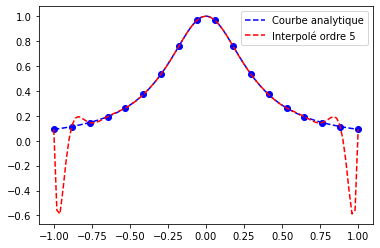

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

true_x = np.linspace(-1,1,100)
true_y = 1/(1+10*true_x**2)

x_arr = np.linspace(-1,1,18) # 18 points d'interpolations
y_arr = 1/(1+10*x_arr**2)

interp_y = lagrange(x_arr,y_arr)

plt.plot(x_arr,y_arr,'bo')
plt.plot(true_x,true_y,'b--',label="Courbe analytique")

plt.plot(true_x,np.polyval(interp_y,true_x),'r--',label="Interpolé ordre 5")
plt.legend()
plt.show()